In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neural_net import NeuralNetwork
from operations import *
from sklearn.utils import shuffle

In [2]:
def load_dataset(csv_path, target_feature):
    dataset = pd.read_csv(csv_path)
    t = np.expand_dims(dataset[target_feature].to_numpy().astype(np.float64), axis=1)
    X = dataset.drop([target_feature], axis=1).to_numpy()
    return X, t

In [3]:
X, y = load_dataset("./data/banknote_authentication.csv", "target")

# Split the data by K-fold with K=5
k_fold = 5
#np.random.seed(486)
trainXs = X
trainYs = y
trainXs, trainYs = shuffle(trainXs, trainYs)
size = X.shape[0] // k_fold
Train = []
Valid = []

for k in range(k_fold):
    X_train = np.concatenate((trainXs[0:k*size], trainXs[(k+1)*size:]))
    y_train = np.concatenate((trainYs[0:k*size], trainYs[(k+1)*size:]))
    X_valid = trainXs[k*size:(k+1)*size]
    y_valid = trainYs[k*size:(k+1)*size]

    Train.append((X_train, y_train))
    Valid.append((X_valid, y_valid))

In [4]:
print(X.shape)
print(Valid[2][0].shape)
print(Valid[2][1].shape)

(1372, 4)
(274, 4)
(274, 1)


In [5]:
# count how many 1s in each validation set
for i in range(k_fold):
    print(np.sum(Valid[i][1]))

123.0
121.0
120.0
131.0
115.0


In [6]:
losses = []
accuracies = []
accuracies_std = []
epochs = 1000
valid_results = []

for k in range(k_fold):
    X_train = Train[k][0]
    y_train = Train[k][1]
    X_valid = Valid[k][0]
    y_valid = Valid[k][1]

    n_features = X_train.shape[1]
    net = NeuralNetwork(n_features, [32,32,16,1], [ReLU(), ReLU(), ReLU(), Sigmoid()], CrossEntropy(), learning_rate=0.01)

    # Train the network, use loss as output
    trained_W, epoch_losses = net.train(X_train, y_train, epochs)
    losses.append(epoch_losses)

    # Forward the validation set to get the output
    Y_predict = net.forward_pass(X_valid)[1][-1]
    valid_results.append(Y_predict)

    # Evaluate the network on the test set, use accuracy as output
    print("Accuracy on test set: {}".format(net.evaluate(X_valid, y_valid, accuracy)))
    accuracies.append(net.evaluate(X_valid, y_valid, accuracy))

    # Evaluate the network on the valid set, calculate the standard deviation of the accuracy
    acc = [net.evaluate(X_valid[i], y_valid[i], accuracy) for i in range(X_valid.shape[0])]
    STD = np.std(acc)
    print("Standard deviation of accuracy on validation set: {}".format(STD))
    accuracies_std.append(STD)

Accuracy on test set: 0.9963503649635036
Standard deviation of accuracy on validation set: 0.0603018673060522
Accuracy on test set: 1.0
Standard deviation of accuracy on validation set: 0.0
Accuracy on test set: 1.0
Standard deviation of accuracy on validation set: 0.0
Accuracy on test set: 0.9963503649635036
Standard deviation of accuracy on validation set: 0.060301867306052206
Accuracy on test set: 1.0
Standard deviation of accuracy on validation set: 0.0


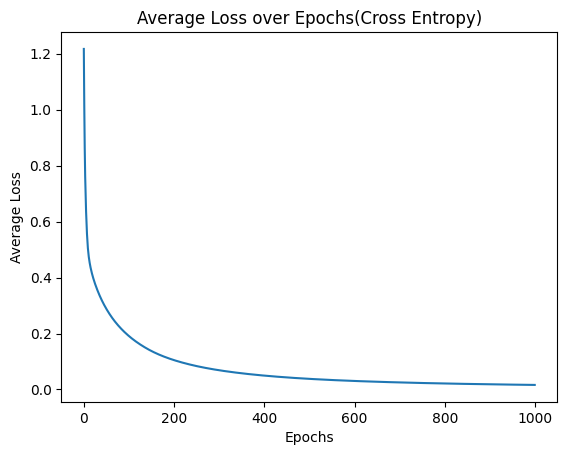

In [7]:
# Plot the average loss over epochs for all folds
avg_loss = np.mean(losses, axis=0)
plt.plot(range(epochs), avg_loss)
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.title("Average Loss over Epochs(Cross Entropy)")
plt.show()

In [8]:
# Print the accuracy for each fold
for i in range(k_fold):
    print("Accuracy on fold {} is {}".format(i, accuracies[i]))

Accuracy on fold 0 is 0.9963503649635036
Accuracy on fold 1 is 1.0
Accuracy on fold 2 is 1.0
Accuracy on fold 3 is 0.9963503649635036
Accuracy on fold 4 is 1.0


In [9]:
# Calculate the total accuracy
total_accuracy = np.mean(accuracies)
print("Total accuracy is {}".format(total_accuracy))

Total accuracy is 0.9985401459854014


In [10]:
# Calculate the standard deviation of the 5 experiments
total_std = np.std(accuracies)
print("Standard deviation of accuracy is {}".format(total_std))

Standard deviation of accuracy is 0.001787948717360009


In [11]:
# Print the standard deviation of the accuracy for each fold
for i in range(k_fold):
    print("Standard deviation of accuracy on fold {} is {}".format(i, accuracies_std[i]))

Standard deviation of accuracy on fold 0 is 0.0603018673060522
Standard deviation of accuracy on fold 1 is 0.0
Standard deviation of accuracy on fold 2 is 0.0
Standard deviation of accuracy on fold 3 is 0.060301867306052206
Standard deviation of accuracy on fold 4 is 0.0


In [12]:
# print the result of the validation set 2
print(valid_results[1])

[[2.67399630e-05]
 [1.74059826e-02]
 [9.49168994e-01]
 [9.99981810e-01]
 [9.57513935e-01]
 [9.88665498e-01]
 [2.17313235e-05]
 [1.01626934e-04]
 [9.97113446e-01]
 [9.98879832e-01]
 [9.90931504e-01]
 [9.93130426e-01]
 [1.88244699e-04]
 [9.99906368e-01]
 [9.99696789e-01]
 [9.84069311e-01]
 [7.45925018e-01]
 [1.99585903e-05]
 [9.99927853e-01]
 [9.58944687e-01]
 [9.89226342e-06]
 [9.90867066e-01]
 [2.64918786e-02]
 [9.99924275e-01]
 [8.05504178e-01]
 [1.28025543e-04]
 [9.96741691e-01]
 [3.74914052e-04]
 [1.84408258e-04]
 [1.50764880e-01]
 [9.99955770e-01]
 [9.99929652e-01]
 [9.81838102e-01]
 [7.47567822e-01]
 [9.94348963e-01]
 [1.90625822e-05]
 [1.75951903e-01]
 [9.89426027e-01]
 [1.43286704e-04]
 [8.13574083e-02]
 [9.93498328e-01]
 [2.96313713e-06]
 [3.22879724e-04]
 [7.16927810e-05]
 [5.97330081e-05]
 [9.99231243e-01]
 [4.24468127e-04]
 [1.42865033e-05]
 [9.81842843e-01]
 [3.37828703e-05]
 [9.99974964e-01]
 [9.89025672e-01]
 [9.30810959e-01]
 [8.04226045e-05]
 [3.93665604e-04]
 [9.821240

In [13]:
# Calculate how much in the validation set 2 is predicted as 1
print(np.sum(valid_results[1] > 0.5))

121
